## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 4


### Дисциплина: Методы машинного обучения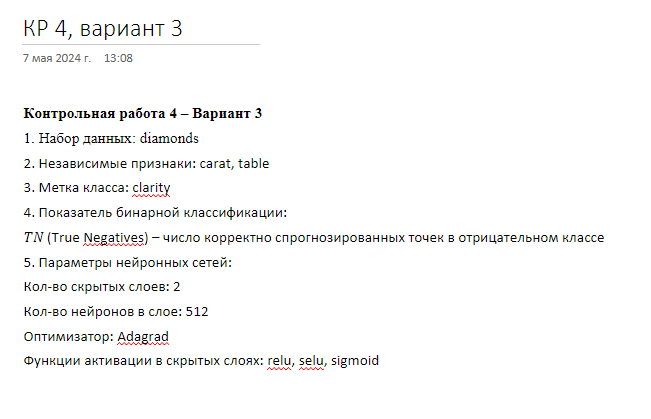

# Фаик Карим Яссерович
# НФИбд-02-21

# 1. Загрузите заданный в индивидуальном задании набор данных из Tensorflow Datasets, включая указанные в задании независимые признаки и метку класса. Оставьте в наборе признаки, принимающие числовые значения.

In [324]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import tensorflow_datasets as tfds

In [325]:
ds = tfds.load("diamonds", split="train")
df = tfds.as_dataframe(ds)
df.columns = ['carat', 'clarity', 'color',	'cut',	'depth',	'table',	'x',	'y',	'z',	'price']
df.head(25)

,carat,clarity,color,cut,depth,table,x,y,z,price
0,1.26,2,4,2,60.599998,60.000000,6.97,7.00,4.23,6546.0
1,0.80,3,4,4,62.099998,54.000000,5.96,5.99,3.71,3030.0
2,0.56,4,2,4,61.700001,54.000000,5.28,5.32,3.27,1915.0
3,1.51,3,6,1,64.000000,58.000000,7.24,7.27,4.64,6936.0
4,0.33,6,5,4,62.200001,54.000000,4.43,4.45,2.76,646.0
5,0.66,4,3,1,59.599998,60.200001,5.66,5.71,3.38,2275.0
6,0.78,1,4,4,61.900002,54.000000,5.89,5.85,3.63,2012.0
7,2.01,3,5,4,66.699997,56.000000,7.75,7.65,5.14,15729.0
8,0.80,1,1,4,61.000000,55.000000,6.00,6.03,3.67,2978.0
9,1.65,2,6,2,61.700001,56.000000,7.61,7.66,4.71,7903.0


# 2. Визуализируйте точки набора данных на плоскости с координатами, соответствующими двум независимым признакам, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду для классов набора данных.

In [326]:
x = df['carat']
y = df['table']
colors = ['red', 'green', 'blue', 'orange', 'purple','brown','pink','cyan']

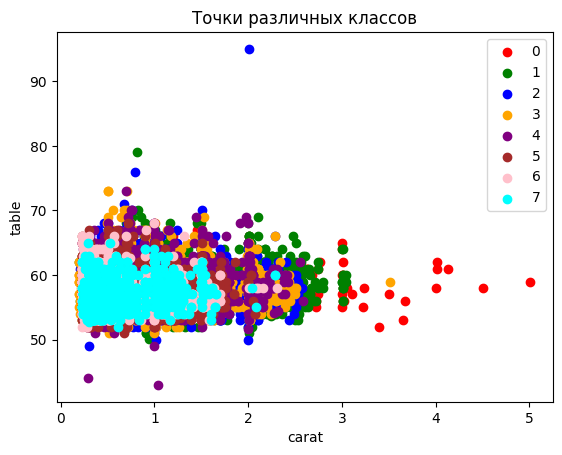

In [327]:
for i in range(0,8):
  plt.scatter(x[df['clarity']==i], y[df['clarity']==i], c = colors[i], label=i)

plt.title('Точки различных классов')
plt.xlabel('carat')
plt.ylabel('table')
plt.legend()

# 3. Если признак с метками классов содержит более двух классов, то объедините некоторые классы, чтобы получить набор для бинарной классификации. Объединяйте классы таким образом, чтобы положительный и отрицательный классы были сопоставимы по количеству точек.

In [328]:
print(df['clarity'].value_counts())

clarity
2    13065
3    12258
1     9194
4     8171
5     5066
6     3655
7     1790
0      741
Name: count, dtype: int64


In [329]:
map = {2:1, 3:0, 4:0, 0:0, 1:1, 5:0 , 6:1, 7:1 } # распределение
df['clarity'] = df['clarity'].map(map)
df['clarity'].value_counts()

clarity
1    27704
0    26236
Name: count, dtype: int64

# 4. Разбейте набор данных из двух признаков и меток класса на обучающую и тестовую выборки. Постройте нейронную сеть с нормализующим слоем и параметрами, указанными в индивидуальном задании, для бинарной классификации и обучите ее на обучающей выборке. Оцените качество бинарной классификации при помощи матрицы ошибок для тестовой выборки.

In [330]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles

In [331]:
x = df[['carat','table']]
y = df['clarity']
n_samples = df.shape[0]
x, y = make_circles(n_samples,
                    noise = 0.03,
                    random_state = 42)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((37758, 2), (16182, 2), (37758,), (16182,))

In [332]:
feature_normalizer = tf.keras.layers.Normalization(axis=None,input_shape=(x_train.shape[1],))
feature_normalizer.adapt(x_train)

In [333]:
model1 = tf.keras.Sequential([
feature_normalizer,
tf.keras.layers.Dense(512, activation='relu',kernel_initializer='he_normal'),
tf.keras.layers.Dense(512, activation='relu',kernel_initializer='he_normal'),
tf.keras.layers.Dense(1, activation='sigmoid')
])
model1.summary()
model1.compile(
loss=tf.keras.losses.binary_crossentropy,
optimizer=tf.keras.optimizers.Adagrad(learning_rate=1e-2),
metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')]
)

Model: "sequential_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_9 (Normaliza  (None, 2)                 3         
 tion)                                                           
                                                                 
 dense_126 (Dense)           (None, 512)               1536      
                                                                 
 dense_127 (Dense)           (None, 512)               262656    
                                                                 
 dense_128 (Dense)           (None, 1)                 513       
                                                                 
Total params: 264708 (1.01 MB)
Trainable params: 264705 (1.01 MB)
Non-trainable params: 3 (16.00 Byte)
_________________________________________________________________


In [334]:
history1 = model1.fit(
  x_train, y_train,
  validation_data=(x_test,y_test),
  epochs=10,
  batch_size=32
)

Epoch 1/10
1180/1180 [==============================] - 9s 7ms/step - loss: 0.6723 - accuracy: 0.5759 - val_loss: 0.6261 - val_accuracy: 0.6562
Epoch 2/10
1180/1180 [==============================] - 7s 6ms/step - loss: 0.5485 - accuracy: 0.7664 - val_loss: 0.4529 - val_accuracy: 0.8886
Epoch 3/10
1180/1180 [==============================] - 8s 7ms/step - loss: 0.3125 - accuracy: 0.9550 - val_loss: 0.1926 - val_accuracy: 0.9925
Epoch 4/10
1180/1180 [==============================] - 7s 6ms/step - loss: 0.1220 - accuracy: 0.9971 - val_loss: 0.0776 - val_accuracy: 0.9992
Epoch 5/10
1180/1180 [==============================] - 8s 7ms/step - loss: 0.0577 - accuracy: 0.9993 - val_loss: 0.0432 - val_accuracy: 0.9992
Epoch 6/10
1180/1180 [==============================] - 7s 6ms/step - loss: 0.0354 - accuracy: 0.9995 - val_loss: 0.0284 - val_accuracy: 0.9995
Epoch 7/10
1180/1180 [==============================] - 8s 7ms/step - loss: 0.0252 - accuracy: 0.9993 - val_loss: 0.0227 - val_accuracy:

In [335]:
model2 = tf.keras.Sequential([
feature_normalizer,
tf.keras.layers.Dense(512, activation='selu',kernel_initializer='he_normal'),
tf.keras.layers.Dense(512, activation='selu',kernel_initializer='he_normal'),
tf.keras.layers.Dense(1, activation='sigmoid')
])
model2.summary()
model2.compile(
loss=tf.keras.losses.binary_crossentropy,
optimizer=tf.keras.optimizers.Adagrad(learning_rate=1e-2),
metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')]
)

Model: "sequential_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_9 (Normaliza  (None, 2)                 3         
 tion)                                                           
                                                                 
 dense_129 (Dense)           (None, 512)               1536      
                                                                 
 dense_130 (Dense)           (None, 512)               262656    
                                                                 
 dense_131 (Dense)           (None, 1)                 513       
                                                                 
Total params: 264708 (1.01 MB)
Trainable params: 264705 (1.01 MB)
Non-trainable params: 3 (16.00 Byte)
_________________________________________________________________


In [336]:
history2 = model2.fit(
  x_train, y_train,
  validation_data=(x_test,y_test),
  epochs=10,
  batch_size=32
)

Epoch 1/10
1180/1180 [==============================] - 9s 7ms/step - loss: 0.2041 - accuracy: 0.9379 - val_loss: 0.0284 - val_accuracy: 0.9994
Epoch 2/10
1180/1180 [==============================] - 7s 6ms/step - loss: 0.0190 - accuracy: 0.9996 - val_loss: 0.0135 - val_accuracy: 0.9994
Epoch 3/10
1180/1180 [==============================] - 9s 7ms/step - loss: 0.0106 - accuracy: 0.9995 - val_loss: 0.0089 - val_accuracy: 0.9993
Epoch 4/10
1180/1180 [==============================] - 7s 6ms/step - loss: 0.0078 - accuracy: 0.9995 - val_loss: 0.0068 - val_accuracy: 0.9995
Epoch 5/10
1180/1180 [==============================] - 9s 8ms/step - loss: 0.0062 - accuracy: 0.9994 - val_loss: 0.0055 - val_accuracy: 0.9996
Epoch 6/10
1180/1180 [==============================] - 8s 7ms/step - loss: 0.0053 - accuracy: 0.9994 - val_loss: 0.0050 - val_accuracy: 0.9994
Epoch 7/10
1180/1180 [==============================] - 7s 6ms/step - loss: 0.0046 - accuracy: 0.9995 - val_loss: 0.0048 - val_accuracy:

In [337]:
model3 = tf.keras.Sequential([
feature_normalizer,
tf.keras.layers.Dense(512, activation='sigmoid',kernel_initializer='he_normal'),
tf.keras.layers.Dense(512, activation='sigmoid',kernel_initializer='he_normal'),
tf.keras.layers.Dense(1, activation='sigmoid')
])
model3.summary()
model3.compile(
loss=tf.keras.losses.binary_crossentropy,
optimizer=tf.keras.optimizers.Adagrad(learning_rate=1e-2),
metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')]
)

Model: "sequential_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_9 (Normaliza  (None, 2)                 3         
 tion)                                                           
                                                                 
 dense_132 (Dense)           (None, 512)               1536      
                                                                 
 dense_133 (Dense)           (None, 512)               262656    
                                                                 
 dense_134 (Dense)           (None, 1)                 513       
                                                                 
Total params: 264708 (1.01 MB)
Trainable params: 264705 (1.01 MB)
Non-trainable params: 3 (16.00 Byte)
_________________________________________________________________


In [338]:
history3 = model3.fit(
  x_train, y_train,
  validation_data=(x_test,y_test),
  epochs=10,
  batch_size=32
)

Epoch 1/10
1180/1180 [==============================] - 9s 7ms/step - loss: 0.6941 - accuracy: 0.5139 - val_loss: 0.6866 - val_accuracy: 0.5711
Epoch 2/10
1180/1180 [==============================] - 7s 6ms/step - loss: 0.6849 - accuracy: 0.5625 - val_loss: 0.6809 - val_accuracy: 0.4960
Epoch 3/10
1180/1180 [==============================] - 9s 7ms/step - loss: 0.6743 - accuracy: 0.6170 - val_loss: 0.6702 - val_accuracy: 0.7081
Epoch 4/10
1180/1180 [==============================] - 7s 6ms/step - loss: 0.6596 - accuracy: 0.7118 - val_loss: 0.6492 - val_accuracy: 0.8697
Epoch 5/10
1180/1180 [==============================] - 8s 7ms/step - loss: 0.6394 - accuracy: 0.8240 - val_loss: 0.6267 - val_accuracy: 0.8600
Epoch 6/10
1180/1180 [==============================] - 7s 6ms/step - loss: 0.6127 - accuracy: 0.9053 - val_loss: 0.6006 - val_accuracy: 0.7638
Epoch 7/10
1180/1180 [==============================] - 9s 7ms/step - loss: 0.5820 - accuracy: 0.9630 - val_loss: 0.5672 - val_accuracy:

In [339]:
pred1 = model1.predict(x_test)
pred2 = model2.predict(x_test)
pred3 = model3.predict(x_test)

506/506 [==============================] - 1s 2ms/step


Определим качество бинарной классификации по параметру TN(TrueNegatives)

In [340]:
ev1 = tf.keras.metrics.TrueNegatives()
ev1.update_state(y_test,pred1)

ev2 = tf.keras.metrics.TrueNegatives()
ev2.update_state(y_test,pred2)

ev3 = tf.keras.metrics.TrueNegatives()
ev3.update_state(y_test,pred3)


print(f"accuracy Relu:{ev1.result()}")
print(f"accuracy Selu:{ev2.result()}")
print(f"accuracy Sigmooid:{ev3.result()}")

accuracy Relu:8018.0
accuracy Selu:8018.0
accuracy Sigmooid:8020.0


# 5.Визуализируйте границы принятия решений построенных нейронных сетей на отдельных рисунках на всем наборе данных из двух признаков и бинарных меток классов.  

In [341]:
def plot_decision_boundary(model, X, y):
    # Найдем диапазоны изменения по осям и построим сетку
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    # Набор данных для прогнозирования
    X_in = np.c_[xx.ravel(), yy.ravel()]
    # Прогноз при помощи обученной модели
    y_pred = model.predict(X_in)
    # Проверка мультиклассовости
    if len(y_pred[1]) > 1:
        # мультиклассовая классификация
        # изменяем форму прогноза для визуализации
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        # бинарная классификация
        y_pred = np.round(y_pred).reshape(xx.shape)
    # Рисуем границу решения
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 2ms/step


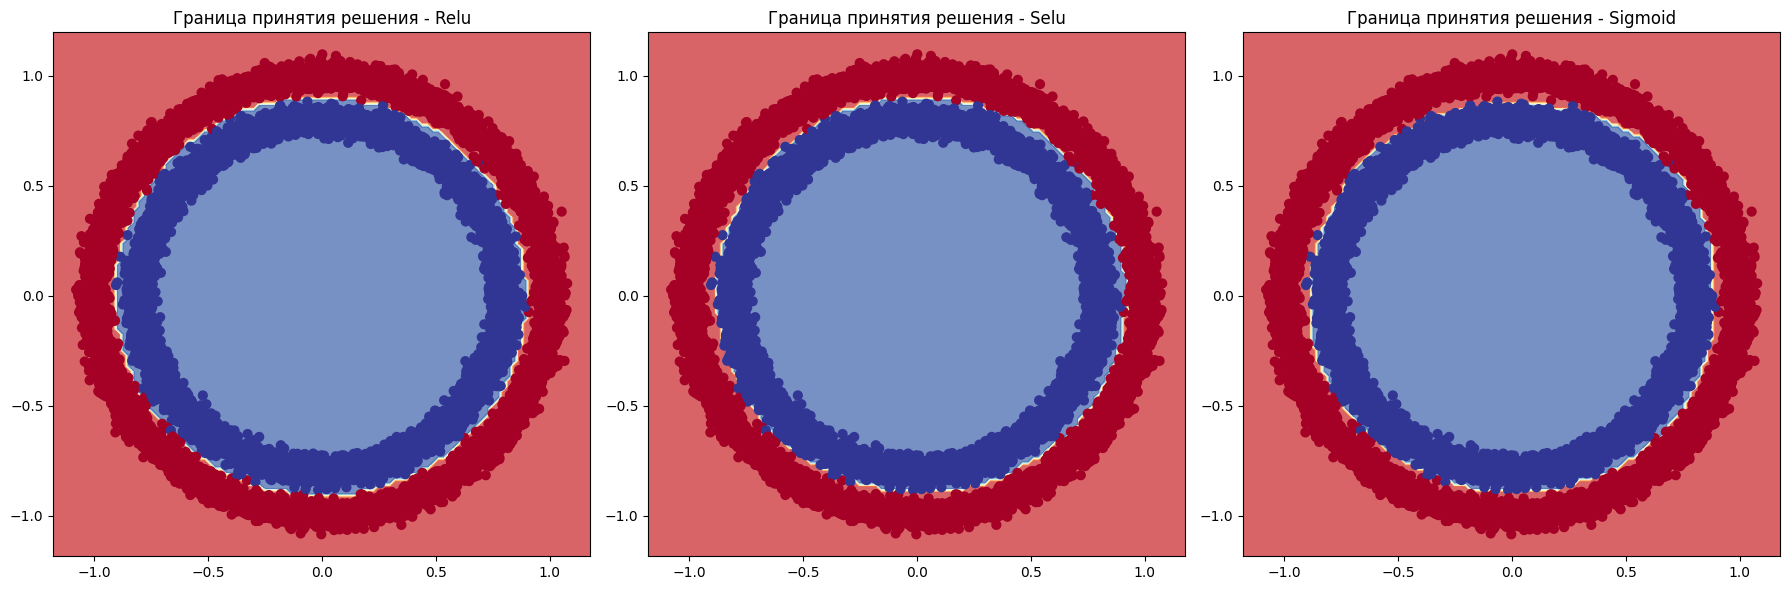

In [342]:
plt.figure(figsize=(18, 6))
plt.subplot(1,3,1)
plot_decision_boundary(model1, x_test, y_test)
plt.title(f'Граница принятия решения - {"Relu"}')
plt.subplot(1,3,2)
plot_decision_boundary(model2, x_test, y_test)
plt.title(f'Граница принятия решения - {"Selu"}')
plt.subplot(1,3,3)
plot_decision_boundary(model3, x_test, y_test)
plt.title(f'Граница принятия решения - {"Sigmoid"}')

plt.tight_layout()
plt.show()

# 6.Визуализируйте на одном рисунке ROC-кривые для построенных классификаторов на основе нейронных сетей, вычислите площади под ROC-кривыми методом трапеций или иным методом и создайте легенду с указанием площадей кривых.

In [343]:
def true_false_positive(threshold_vector, y_test):
    true_positive = np.equal(threshold_vector, 1) & np.equal(y_test, 1)
    true_negative = np.equal(threshold_vector, 0) & np.equal(y_test, 0)
    false_positive = np.equal(threshold_vector, 1) & np.equal(y_test, 0)
    false_negative = np.equal(threshold_vector, 0) & np.equal(y_test, 1)

    tpr = true_positive.sum() / (true_positive.sum() + false_negative.sum())
    fpr = false_positive.sum() / (false_positive.sum() + true_negative.sum())

    return tpr, fpr

In [344]:
def roc_from_scratch(probabilities, y_test, partitions=100):
    roc = np.array([])
    for i in range(partitions + 1):

        threshold_vector = np.greater_equal(probabilities, i / partitions).astype(int)
        tpr, fpr = true_false_positive(threshold_vector, y_test)
        roc = np.append(roc, [fpr, tpr])

    return roc.reshape(-1, 2)

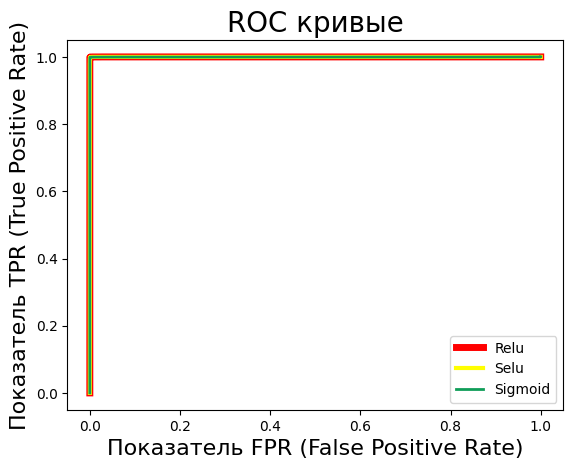

In [345]:
ROC1 = roc_from_scratch(pred1.reshape(-1),y_test,partitions=50)
ROC2 = roc_from_scratch(pred2.reshape(-1),y_test,partitions=50)
ROC3 = roc_from_scratch(pred3.reshape(-1),y_test,partitions=50)
#plt.scatter(ROC[:,0],ROC[:,1],color='#0F9D58',s=100)
plt.plot(ROC1[:,0],ROC[:,1],color='red',lw=5,label = "Relu")
plt.plot(ROC2[:,0],ROC[:,1],color='yellow',lw=3,label = "Selu")
plt.plot(ROC3[:,0],ROC[:,1],color='#0F9D58',lw=2,label = "Sigmoid")
plt.title('ROC кривые',fontsize=20)
plt.xlabel('Показатель FPR (False Positive Rate)',fontsize=16)
plt.ylabel('Показатель TPR (True Positive Rate)',fontsize=16);
plt.legend()

In [346]:
from sklearn.metrics import roc_auc_score
score1 = roc_auc_score(y_test, pred1)
score2 = roc_auc_score(y_test, pred2)
score3 = roc_auc_score(y_test, pred3)
print(f'Площадь под ROC-кривой для Relu: {score1}')
print(f'Площадь под ROC-кривой для Selu: {score2}')
print(f'Площадь под ROC-кривой для Sigmoid: {score3}')

Площадь под ROC-кривой для Relu: 0.9999982737564417
Площадь под ROC-кривой для Selu: 0.9999866788992664
Площадь под ROC-кривой для Sigmoid: 0.9999922242657415


# 7.Определите исходном наборе данных дополнительный признак, отличный от указанных в задании двух независимых признаков, принимающий непрерывные значения и имеющий максимальную дисперсию.

In [347]:
df.dtypes

carat      float32
clarity      int64
color        int64
cut          int64
depth      float32
table      float32
x          float32
y          float32
z          float32
price      float32
dtype: object

In [348]:
df.var().idxmax(), df.var().max()

('price', 15915629.0)

# 8.Визуализируйте точки набора данных в трехмерном пространстве с координатами, соответствующими трем независимым признакам, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду для классов набора данных.

In [349]:
from mpl_toolkits.mplot3d import Axes3D
df = tfds.as_dataframe(ds)
df.head()

,features/carat,features/clarity,features/color,features/cut,features/depth,features/table,features/x,features/y,features/z,price
0,1.26,2,4,2,60.599998,60.0,6.97,7.00,4.23,6546.0
1,0.80,3,4,4,62.099998,54.0,5.96,5.99,3.71,3030.0
2,0.56,4,2,4,61.700001,54.0,5.28,5.32,3.27,1915.0
3,1.51,3,6,1,64.000000,58.0,7.24,7.27,4.64,6936.0
4,0.33,6,5,4,62.200001,54.0,4.43,4.45,2.76,646.0


In [350]:
feature1 = df['features/carat']
feature2 = df['features/table']
feature3 = df['price']

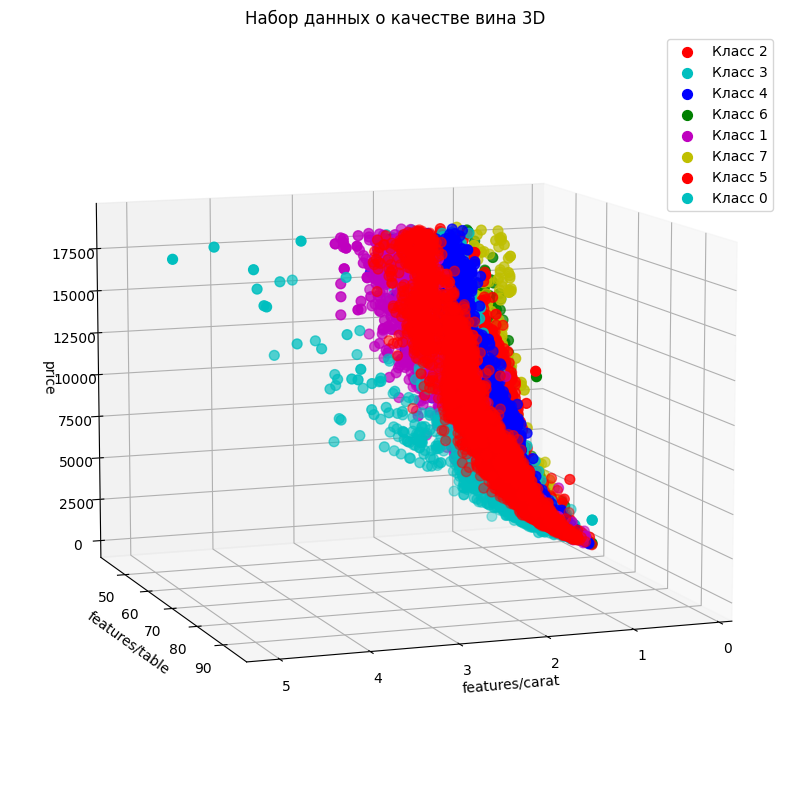

In [351]:
df_multiclass = df[['features/carat', 'features/table', 'price', 'features/clarity']]

сlasses_multi = sorted(df_multiclass['features/clarity'].unique())
class_multi_data = {c: df_multiclass[df_multiclass['features/clarity'] == c] for c in сlasses_multi}
colors = ['r', 'c', 'b', 'g', 'm', 'y']

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

for i, c in enumerate(df['features/clarity'].unique()):
    ax.scatter(class_multi_data[c]['features/carat'],
               class_multi_data[c]['features/table'],
               class_multi_data[c]['price'],
               label=f'Класс {c}', color=colors[i % len(colors)], s=50)

ax.set_xlabel('features/carat')
ax.set_ylabel('features/table')
ax.set_zlabel('price')
ax.set_title('Набор данных о качестве вина 3D')
ax.view_init(elev = 10, azim = 70)
plt.legend()

# 9.Разбейте исходный набор данных на обучающую и тестовую выборки. Постройте нейронную сеть для многоклассовой классификации с нормализующим слоем и параметрами, соответствующими лучшей нейронной сети для бинарной классифиации из п.4, и обучите ее на обучающей выборке, контролируя процесс ее обучения.

In [352]:
df_multiclass

,features/carat,features/table,price,features/clarity
0,1.26,60.0,6546.0,2
1,0.80,54.0,3030.0,3
2,0.56,54.0,1915.0,4
3,1.51,58.0,6936.0,3
4,0.33,54.0,646.0,6
...,...,...,...,...
53935,1.02,59.0,4796.0,2
53936,0.93,59.0,3750.0,2
53937,0.30,54.0,491.0,4
53938,0.36,55.0,807.0,3


In [355]:
X = df.drop('features/clarity',axis=1)
Y = df['features/clarity']
Y.unique()

array([2, 3, 4, 6, 1, 7, 5, 0])

In [356]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape


((37758, 9), (16182, 9), (37758,), (16182,))

In [357]:

def to_one_hot(labels, dimension=9):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label-3] = 1.
    return results

In [358]:
Y_train = to_one_hot(Y_train)
Y_test = to_one_hot(Y_test)
Y_train.shape, Y_test.shape

((37758, 9), (16182, 9))

In [359]:
X_train.shape

(37758, 9)

In [360]:
feature_normalizer = tf.keras.layers.Normalization(axis=None,input_shape=(X.shape[1],))
feature_normalizer.adapt(X_train)

In [365]:
model = tf.keras.Sequential([
feature_normalizer,
tf.keras.layers.Dense(512, activation='relu',kernel_initializer='he_normal'),
tf.keras.layers.Dense(512, activation='relu',kernel_initializer='he_normal'),
tf.keras.layers.Dense(7, activation='sigmoid')
])
model.summary()
model.compile(
loss=tf.keras.losses.categorical_crossentropy,
optimizer=tf.keras.optimizers.Adagrad(learning_rate=1e-2),
metrics=[tf.keras.metrics.Accuracy(name='accuracy')]
)

Model: "sequential_47"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_10 (Normaliz  (None, 9)                 3         
 ation)                                                          
                                                                 
 dense_141 (Dense)           (None, 512)               5120      
                                                                 
 dense_142 (Dense)           (None, 512)               262656    
                                                                 
 dense_143 (Dense)           (None, 7)                 3591      
                                                                 
Total params: 271370 (1.04 MB)
Trainable params: 271367 (1.04 MB)
Non-trainable params: 3 (16.00 Byte)
_________________________________________________________________


In [366]:
history1 = model1.fit(
  x_train, y_train,
  validation_data=(x_test,y_test),
  epochs=20,
  batch_size=32
)

Epoch 1/20
1180/1180 [==============================] - 9s 7ms/step - loss: 0.0087 - accuracy: 0.9995 - val_loss: 0.0093 - val_accuracy: 0.9994
Epoch 2/20
1180/1180 [==============================] - 9s 8ms/step - loss: 0.0080 - accuracy: 0.9995 - val_loss: 0.0077 - val_accuracy: 0.9995
Epoch 3/20
1180/1180 [==============================] - 8s 7ms/step - loss: 0.0074 - accuracy: 0.9996 - val_loss: 0.0075 - val_accuracy: 0.9993
Epoch 4/20
1180/1180 [==============================] - 7s 6ms/step - loss: 0.0069 - accuracy: 0.9996 - val_loss: 0.0068 - val_accuracy: 0.9994
Epoch 5/20
1180/1180 [==============================] - 8s 7ms/step - loss: 0.0065 - accuracy: 0.9995 - val_loss: 0.0065 - val_accuracy: 0.9994
Epoch 6/20
1180/1180 [==============================] - 7s 6ms/step - loss: 0.0061 - accuracy: 0.9995 - val_loss: 0.0064 - val_accuracy: 0.9994
Epoch 7/20
1180/1180 [==============================] - 9s 7ms/step - loss: 0.0058 - accuracy: 0.9996 - val_loss: 0.0060 - val_accuracy:

# 10. Постройте кривые обучения в зависимости от эпохи обучения, подписывая оси и рисунок и создавая легенду.

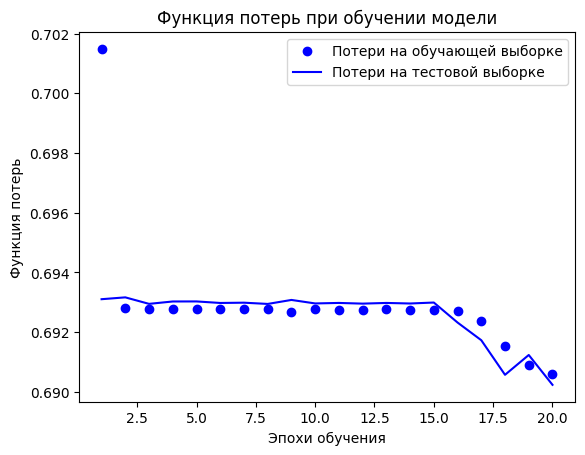

In [367]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Потери на обучающей выборке")
plt.plot(epochs, val_loss, "b", label="Потери на тестовой выборке")
plt.title("Функция потерь при обучении модели")
plt.xlabel("Эпохи обучения")
plt.ylabel("Функция потерь")
plt.legend();